In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('transaction_anomalies_dataset.csv')
df.head()

,Transaction_ID,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Day_of_Week,Time_of_Day,Age,Gender,Income,Account_Type
0,TX0,1024.835708,3,997.234714,12,29,Friday,06:00,36,Male,1436074,Savings
1,TX1,1013.952065,4,1020.210306,7,22,Friday,01:00,41,Female,627069,Savings
2,TX2,970.956093,1,989.496604,5,12,Tuesday,21:00,61,Male,786232,Savings
3,TX3,1040.822254,2,969.522480,16,28,Sunday,14:00,61,Male,619030,Savings
4,TX4,998.777241,1,1007.111026,7,7,Friday,08:00,56,Female,649457,Savings


In [5]:
df.isnull().sum()

Transaction_ID                 0
Transaction_Amount             0
Transaction_Volume             0
Average_Transaction_Amount     0
Frequency_of_Transactions      0
Time_Since_Last_Transaction    0
Day_of_Week                    0
Time_of_Day                    0
Age                            0
Gender                         0
Income                         0
Account_Type                   0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Transaction_ID               1000 non-null   object 
 1   Transaction_Amount           1000 non-null   float64
 2   Transaction_Volume           1000 non-null   int64  
 3   Average_Transaction_Amount   1000 non-null   float64
 4   Frequency_of_Transactions    1000 non-null   int64  
 5   Time_Since_Last_Transaction  1000 non-null   int64  
 6   Day_of_Week                  1000 non-null   object 
 7   Time_of_Day                  1000 non-null   object 
 8   Age                          1000 non-null   int64  
 9   Gender                       1000 non-null   object 
 10  Income                       1000 non-null   int64  
 11  Account_Type                 1000 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 93.9+ KB


In [8]:
df.describe()

,Transaction_Amount,Transaction_Volume,Average_Transaction_Amount,Frequency_of_Transactions,Time_Since_Last_Transaction,Age,Income
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,1038.122511,2.498000,1000.682506,12.078000,15.341000,40.641000,8.948238e+05
std,283.580055,1.115006,20.632334,4.245225,8.361258,13.819953,3.453562e+05
min,849.024392,1.000000,939.081423,5.000000,1.000000,18.000000,3.001590e+05
25%,966.028796,1.000000,986.800556,8.000000,8.000000,29.000000,5.917308e+05
50%,1002.118678,3.000000,1000.501902,12.000000,16.000000,41.000000,8.876645e+05
75%,1033.143657,3.000000,1015.155595,16.000000,22.000000,53.000000,1.178102e+06
max,3227.459108,4.000000,1073.154036,19.000000,29.000000,64.000000,1.499670e+06


<Axes: xlabel='Transaction_Amount', ylabel='Count'>

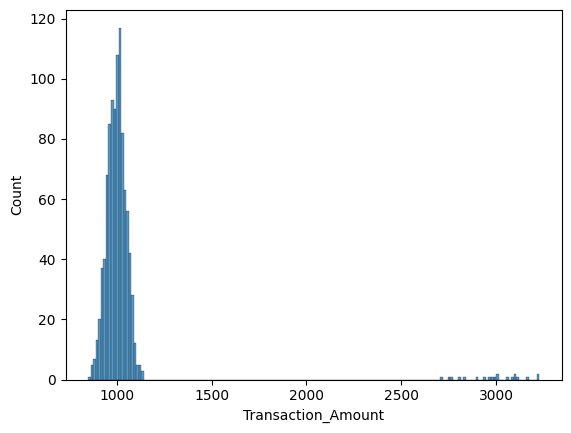

In [9]:
sns.histplot(df['Transaction_Amount'])

Text(0.5, 1.0, 'Transaction Amount by Account Type')

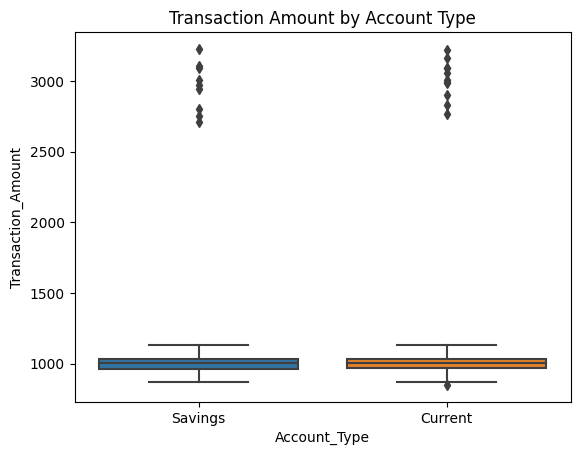

In [10]:
sns.boxplot(data=df,x='Account_Type',y='Transaction_Amount')
plt.title('Transaction Amount by Account Type')

<Axes: xlabel='Age', ylabel='Average_Transaction_Amount'>

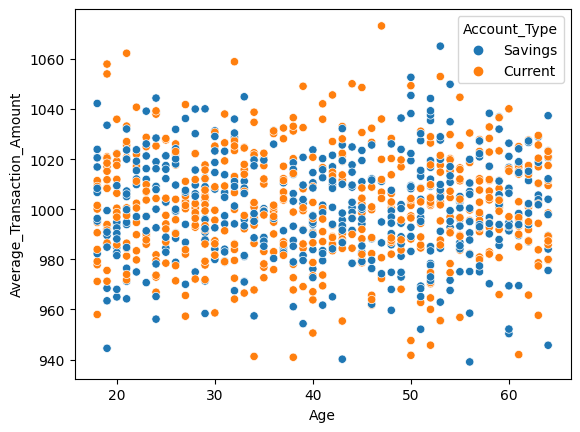

In [11]:
sns.scatterplot(data=df,x='Age',y='Average_Transaction_Amount',hue='Account_Type')

Text(0.5, 1.0, 'Count of Transactions by Day of the Week')

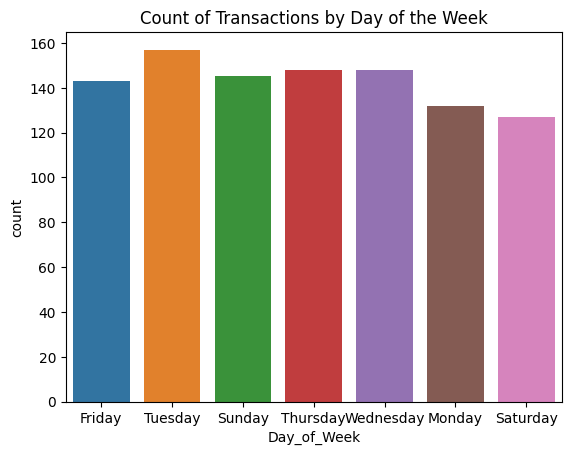

In [12]:
sns.countplot(data=df,x='Day_of_Week')
plt.title('Count of Transactions by Day of the Week')

<ipython-input-13-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

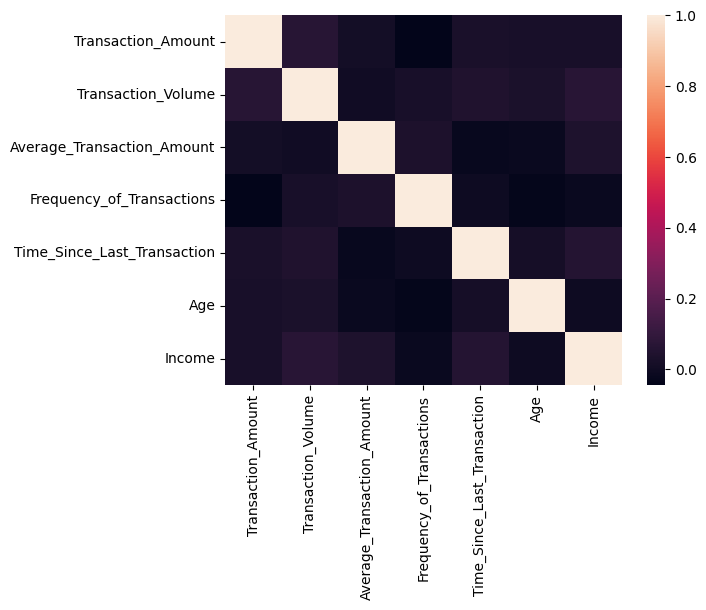

In [13]:
sns.heatmap(df.corr())

In [14]:
mean_amount = df['Transaction_Amount'].mean()
std_amount = df['Transaction_Amount'].std()
anomaly_threshold=mean_amount + 2*std_amount
df['is_anomaly']=df['Transaction_Amount'] > anomaly_threshold
df['is_anomaly'].sum()

20

Text(0.5, 1.0, 'Anomalies in Transaction Amount')

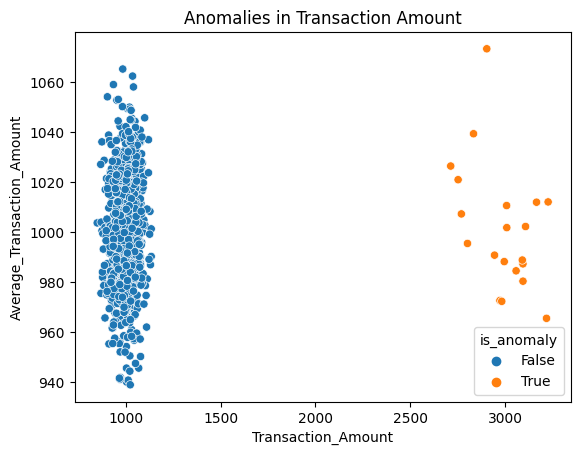

In [15]:
sns.scatterplot(data=df,x='Transaction_Amount',y='Average_Transaction_Amount',hue='is_anomaly')
plt.title('Anomalies in Transaction Amount')

In [16]:
from sklearn.model_selection import train_test_split
x = df[['Transaction_Amount','Average_Transaction_Amount','Frequency_of_Transactions']]
y = df['is_anomaly']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
from sklearn.ensemble import IsolationForest
model=IsolationForest(contamination='auto',random_state=42)
model.fit(x_train)

IsolationForest(random_state=42)

In [18]:
y_pred = model.predict(x_test)
y_pred

array([ 1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1, -1, -1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,
        1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1])

In [20]:
y_pred_binary = [1 if pred == -1 else 0 for pred in y_pred]
from sklearn.metrics import classification_report
report=classification_report(y_test,y_pred_binary)
print(report)

              precision    recall  f1-score   support

       False       1.00      0.83      0.91       196
        True       0.11      1.00      0.19         4

    accuracy                           0.83       200
   macro avg       0.55      0.91      0.55       200
weighted avg       0.98      0.83      0.89       200



In [21]:
# Relevant features used during training
relevant_features = ['Transaction_Amount', 'Average_Transaction_Amount', 'Frequency_of_Transactions']

# Get user inputs for features
user_inputs = []
for feature in relevant_features:
    user_input = float(input(f"Enter the value for '{feature}': "))
    user_inputs.append(user_input)

# Create a DataFrame from user inputs
user_df = pd.DataFrame([user_inputs], columns=relevant_features)

# Predict anomalies using the model
user_anomaly_pred = model.predict(user_df)

# Convert the prediction to binary value (0: normal, 1: anomaly)
user_anomaly_pred_binary = 1 if user_anomaly_pred == -1 else 0

if user_anomaly_pred_binary == 1:
    print("Anomaly detected: This transaction is flagged as an anomaly.")
else:
    print("No anomaly detected: This transaction is normal.")

Enter the value for 'Transaction_Amount': 10000
Enter the value for 'Average_Transaction_Amount': 900
Enter the value for 'Frequency_of_Transactions': 6
Anomaly detected: This transaction is flagged as an anomaly.
